In [1]:
import pandas as pd


In [3]:
df = pd.read_excel('/content/dados_frutas.xlsx')
df

,Arredondada,Suculenta,Vermelha,Doce,Fruta
0,0,1,1,1,Morango
1,1,0,0,0,Limão
2,1,1,0,1,Pera
3,0,0,0,1,Banana
4,1,1,1,1,Cereja
5,1,1,1,0,Tomate
6,1,1,1,1,Maçã


Como Aplicar o Método de Slide para Descobrir a fruta ?


In [8]:
filtro_redonda = df['Arredondada']==1
filtro_suculenta = df['Suculenta']==1
filtro_vermelha = df['Vermelha']==1
filtro_doce = df['Doce']==1

df[filtro_redonda & filtro_suculenta & filtro_vermelha & filtro_doce]

,Arredondada,Suculenta,Vermelha,Doce,Fruta
4,1,1,1,1,Cereja
6,1,1,1,1,Maçã


Como Podemos Fazer a Máquina Aprender ?

In [9]:
from sklearn import tree

In [10]:
features = ['Arredondada', 'Suculenta', 'Vermelha', 'Doce']
target = 'Fruta'

x = df[features]
y = df[target]



In [11]:
arvore = tree.DecisionTreeClassifier()
arvore.fit(x,y)

DecisionTreeClassifier()

In [15]:
import matplotlib.pyplot as plt

[Text(0.4, 0.9, 'Suculenta <= 0.5\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]\nclass = Banana'),
 Text(0.2, 0.7, 'Arredondada <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0]\nclass = Banana'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]\nclass = Banana'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]\nclass = Limão'),
 Text(0.6, 0.7, 'Arredondada <= 0.5\ngini = 0.8\nsamples = 5\nvalue = [0, 1, 0, 1, 1, 1, 1]\nclass = Cereja'),
 Text(0.5, 0.8, '  False'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]\nclass = Morango'),
 Text(0.7, 0.5, 'Doce <= 0.5\ngini = 0.75\nsamples = 4\nvalue = [0, 1, 0, 1, 0, 1, 1]\nclass = Cereja'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]\nclass = Tomate'),
 Text(0.8, 0.3, 'Vermelha <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [0, 1, 0, 1, 0, 1, 0]\nclass = Cereja'),
 Text(0.7, 0.1, '

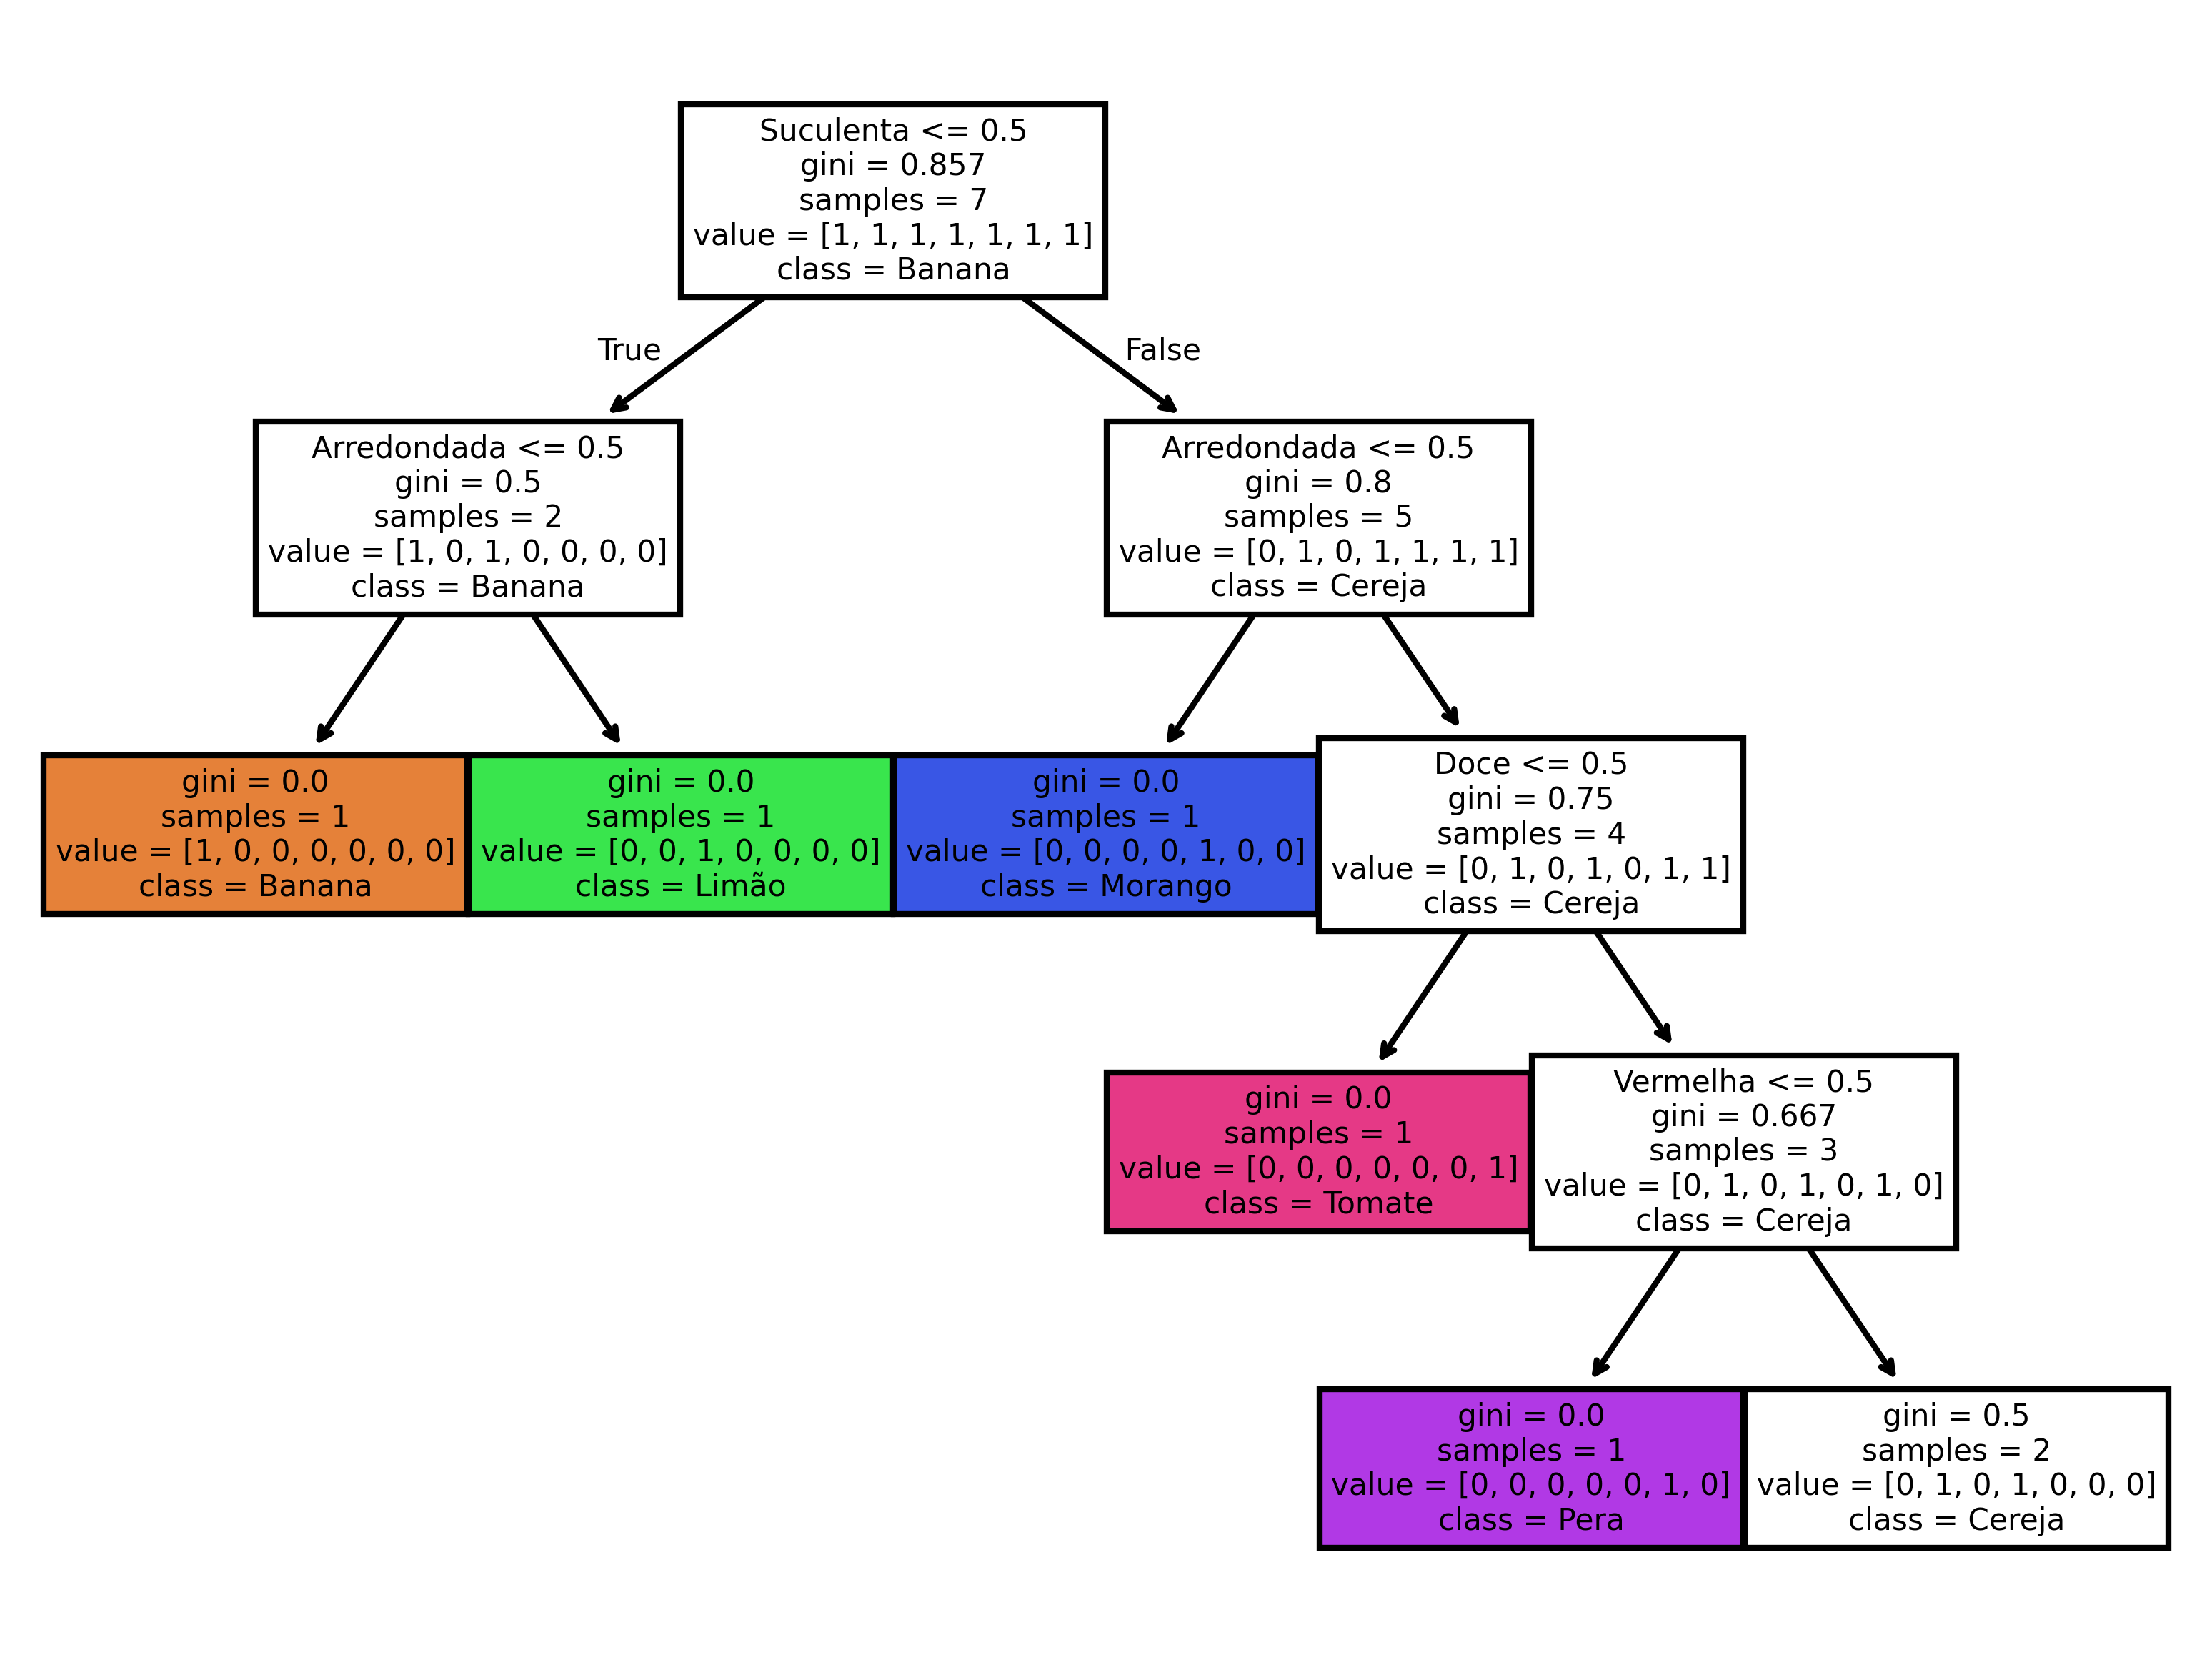

In [16]:
plt.figure(dpi = 600)
tree.plot_tree(arvore, class_names=arvore.classes_, feature_names=features, filled=True)

In [25]:
#[Arredondada, Suculenta, Vermelha, Doce]
arvore.predict([[0,1,1,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Morango'], dtype=object)

In [23]:
#[Arredondada, Suculenta, Vermelha, Doce]
probas = arvore.predict_proba([[0,1,1,1]])  [0]
pd.Series(probas, index=arvore.classes_)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,0
Banana,0.0
Cereja,0.0
Limão,0.0
Maçã,0.0
Morango,1.0
Pera,0.0
Tomate,0.0
